In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder

In [2]:
df_train = pd.read_csv('../../Datasets/house_prices/train.csv')
df_test = pd.read_csv('../../Datasets/house_prices/test.csv')

In [3]:
numeric_col = list(df_train.select_dtypes(exclude = 'object').columns)
cat_col = list(df_train.select_dtypes(include = 'object').columns)
cat_col

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [4]:
df_train['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [5]:
dict_1 = dict.fromkeys(numeric_col,['NA',''])

In [6]:
df_train = pd.read_csv('../../Datasets/house_prices/train.csv',keep_default_na= False, na_values= dict_1)
df_test = pd.read_csv('../../Datasets/house_prices/test.csv',keep_default_na= False, na_values= dict_1)

In [7]:
df_train.shape, df_test.shape

((1460, 81), (1459, 80))

In [8]:
def get_outliers(df):
    outliers=[]
    threshold_df = 3
    mean_df = np.mean(df)
    std_df = np.std(df)
    for i in df:
        z_score= (i - mean_df)/std_df
        if np.abs(z_score) > threshold_df:
            outliers.append(i)
    return outliers

In [9]:
outliers_df_train = get_outliers(df_train['SalePrice'])
print(outliers_df_train)

[438780, 501837, 475000, 437154, 426000, 555000, 440000, 430000, 446261, 451950, 423000, 755000, 538000, 485000, 582933, 611657, 556581, 424870, 625000, 745000, 465000, 466500]


In [10]:
min(outliers_df_train)

423000

In [11]:
df_train_or = df_train[df_train['SalePrice'] < 550000]
df_train_or

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NA,Reg,Lvl,AllPub,...,0,NA,MnPrv,NA,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NA,Reg,Lvl,AllPub,...,0,NA,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,4,2010,WD,Normal,142125


In [12]:
df_train.shape


(1460, 81)

In [13]:
df_train_or.isna().sum()[df_train_or.isna().sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [14]:
df_test.isna().sum()[df_test.isna().sum()>0]

LotFrontage     227
MasVnrArea       15
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt      78
GarageCars        1
GarageArea        1
dtype: int64

In [15]:
numeric_col.remove('Id')
numeric_col.remove('SalePrice')
print(numeric_col)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [16]:
print(cat_col)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


# Handling of Missing Values

In [17]:
numeric_imputer = SimpleImputer(strategy= 'median')
cat_imputer = SimpleImputer(strategy= 'most_frequent')

numeric_imputer.fit(df_train_or[numeric_col])
cat_imputer.fit(df_train_or[cat_col])

SimpleImputer(strategy='most_frequent')

In [18]:
df_train_or[numeric_col] = numeric_imputer.transform(df_train_or[numeric_col])
df_train_or[cat_col] = cat_imputer.transform(df_train_or[cat_col])

df_test[numeric_col] = numeric_imputer.transform(df_test[numeric_col])
df_test[cat_col] = cat_imputer.transform(df_test[cat_col])

C:\Users\Rohan\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\Rohan\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [19]:
df_corr = df_train_or.corr()['SalePrice']
print(df_corr)
selected_numerical_cols = []
for i,j in df_corr.iteritems():
    if abs(j)>0.1:
        selected_numerical_cols.append(i)
print(selected_numerical_cols)

Id              -0.036107
MSSubClass      -0.087039
LotFrontage      0.309303
LotArea          0.263448
OverallQual      0.799710
OverallCond     -0.074423
YearBuilt        0.542443
YearRemodAdd     0.529793
MasVnrArea       0.447669
BsmtFinSF1       0.367089
BsmtFinSF2      -0.015671
BsmtUnfSF        0.216192
TotalBsmtSF      0.598780
1stFlrSF         0.592078
2ndFlrSF         0.294479
LowQualFinSF    -0.024352
GrLivArea        0.689272
BsmtFullBath     0.239976
BsmtHalfBath    -0.034087
FullBath         0.554585
HalfBath         0.281350
BedroomAbvGr     0.161346
KitchenAbvGr    -0.142037
TotRmsAbvGrd     0.517120
Fireplaces       0.466351
GarageYrBlt      0.483466
GarageCars       0.653949
GarageArea       0.636866
WoodDeckSF       0.334481
OpenPorchSF      0.327696
EnclosedPorch   -0.129635
3SsnPorch        0.052151
ScreenPorch      0.106495
PoolArea         0.031357
MiscVal         -0.020505
MoSold           0.073887
YrSold          -0.027694
SalePrice        1.000000
Name: SalePr

In [20]:
sum(df_train_or.isna().sum())

0

In [21]:
sum(df_test.isna().sum()>0)

0

# Feature Encoding

In [22]:
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(df_train_or[cat_col])

OneHotEncoder(handle_unknown='ignore')

In [24]:
enc_cols = ohe.get_feature_names()
enc_cols

array(['x0_C (all)', 'x0_FV', 'x0_RH', 'x0_RL', 'x0_RM', 'x1_Grvl',
       'x1_Pave', 'x2_Grvl', 'x2_NA', 'x2_Pave', 'x3_IR1', 'x3_IR2',
       'x3_IR3', 'x3_Reg', 'x4_Bnk', 'x4_HLS', 'x4_Low', 'x4_Lvl',
       'x5_AllPub', 'x5_NoSeWa', 'x6_Corner', 'x6_CulDSac', 'x6_FR2',
       'x6_FR3', 'x6_Inside', 'x7_Gtl', 'x7_Mod', 'x7_Sev', 'x8_Blmngtn',
       'x8_Blueste', 'x8_BrDale', 'x8_BrkSide', 'x8_ClearCr',
       'x8_CollgCr', 'x8_Crawfor', 'x8_Edwards', 'x8_Gilbert',
       'x8_IDOTRR', 'x8_MeadowV', 'x8_Mitchel', 'x8_NAmes', 'x8_NPkVill',
       'x8_NWAmes', 'x8_NoRidge', 'x8_NridgHt', 'x8_OldTown', 'x8_SWISU',
       'x8_Sawyer', 'x8_SawyerW', 'x8_Somerst', 'x8_StoneBr', 'x8_Timber',
       'x8_Veenker', 'x9_Artery', 'x9_Feedr', 'x9_Norm', 'x9_PosA',
       'x9_PosN', 'x9_RRAe', 'x9_RRAn', 'x9_RRNe', 'x9_RRNn',
       'x10_Artery', 'x10_Feedr', 'x10_Norm', 'x10_PosA', 'x10_PosN',
       'x10_RRAe', 'x10_RRAn', 'x10_RRNn', 'x11_1Fam', 'x11_2fmCon',
       'x11_Duplex', 'x11_Twnhs', '

In [25]:
temp_train = pd.DataFrame(data = ohe.transform(df_train_or[cat_col]).toarray(),columns=enc_cols)
temp_test = pd.DataFrame(data = ohe.transform(df_test[cat_col]).toarray(),columns=enc_cols)

In [26]:
temp_train.shape, temp_test.shape

((1453, 268), (1459, 268))

In [27]:
selected_numerical_cols.remove('SalePrice')

In [28]:
print(selected_numerical_cols)

['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch']


In [29]:
df_train_final = pd.concat([df_train_or[selected_numerical_cols],temp_train],axis=1)
df_test_final = pd.concat([df_test[selected_numerical_cols],temp_test],axis=1)

In [30]:
X = df_train_final
y = df_train_or['SalePrice'] 

In [31]:
df_train_final.shape, df_test_final.shape

((1460, 294), (1459, 294))

# Model Building

In [36]:
model_rfr = RandomForestRegressor(random_state=50)
model_rfr.fit(X,y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

#using Gridsearch RFR

param_grid = {
    'criterion' : ["squared_error"],
    'bootstrap': [True],
    'max_depth': [80,90,100],
    'max_features': [2,3,4,5],
    'min_samples_leaf': [2,3,4,5,6],
    'min_samples_split': [5,6,8,10],
    'n_estimators': [300,400,500]
}

rf = RandomForestRegressor()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1,verbose = 2)
 

In [33]:
#grid_search.fit(X,y)

In [34]:
import xgboost as xg
model_xgb = xg.XGBRegressor()
model_xgb.fit(X,y)

ModuleNotFoundError: No module named 'xgboost'

In [35]:
#yp = model_rfr.predict(df_test_final)
#yp = grid_search.predict(df_test_final)
yp = model_xgb.predict(df_test_final)
yp

NameError: name 'model_xgb' is not defined

In [45]:
df_test = pd.read_csv('Datasets/house price_test.csv')
df_test['SalePrice'] = yp
df_test[['Id','SalePrice']].to_csv('submission_house_price.csv',index=False)

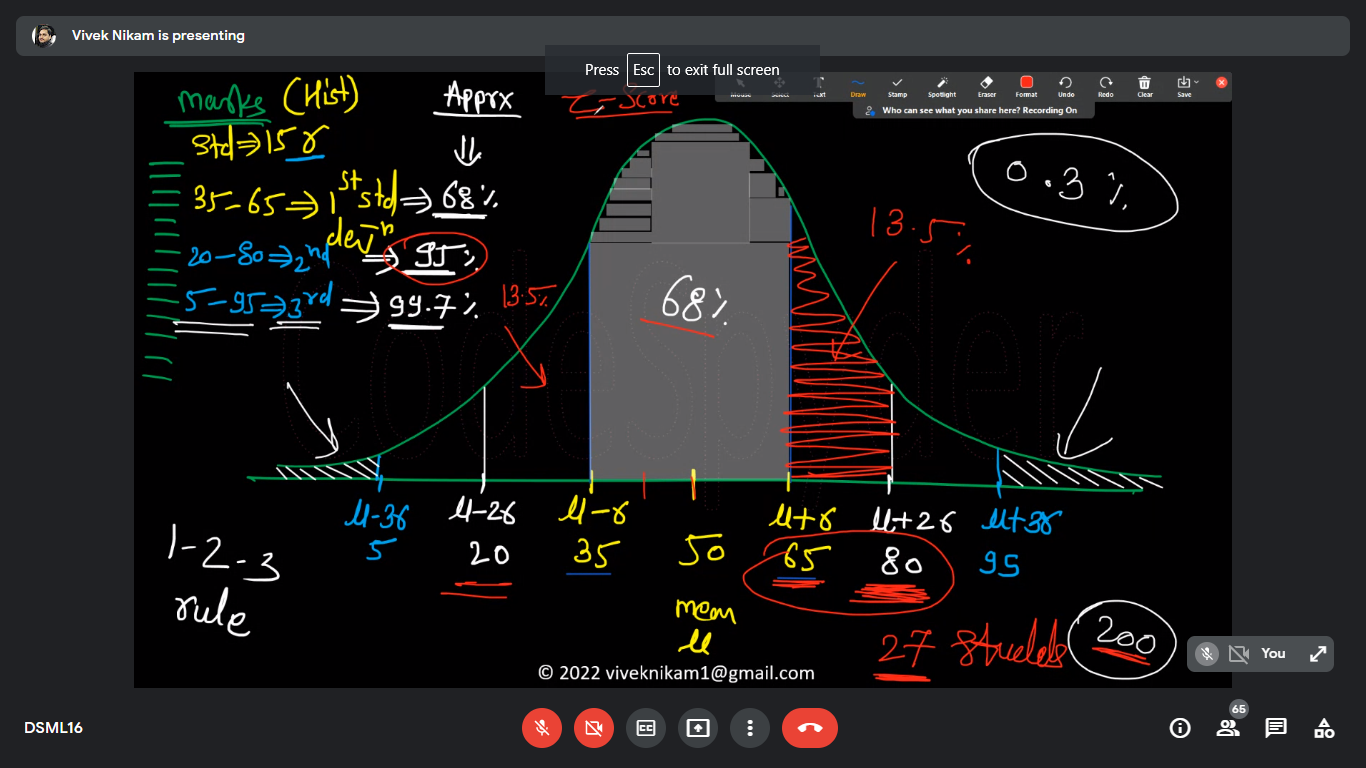